## General Links to Documentation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html - Documentation that could help if you're stuck on the first example specifically.

### Anything with scikit-learn.org is a good place to be for checking documentation.

We've provided some documentation links on the homework for you all to see.

## Perceptron Demo

## SVM Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline

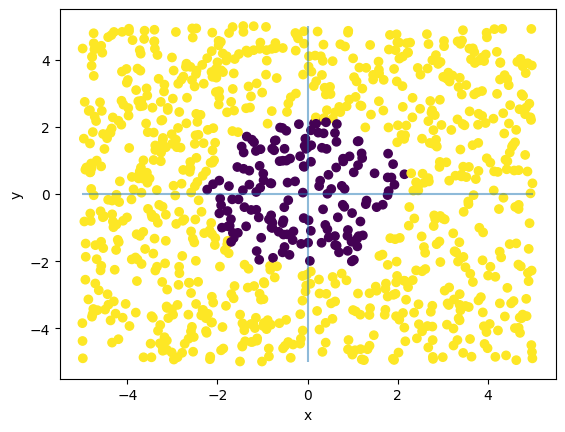

In [2]:
data = []
# randomly generate circular data
for i in range(0,1000):
    point = [np.random.uniform(-5,5),np.random.uniform(-5,5)]
    if point[0]**2 + point[1]**2 < 5:
        point.append(0)
    else:
        point.append(1)
    data.append(point)

data = np.asarray(data)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.vlines(0,-5,5,alpha=0.5); plt.hlines(0,-5,5,alpha=0.5)
plt.show()

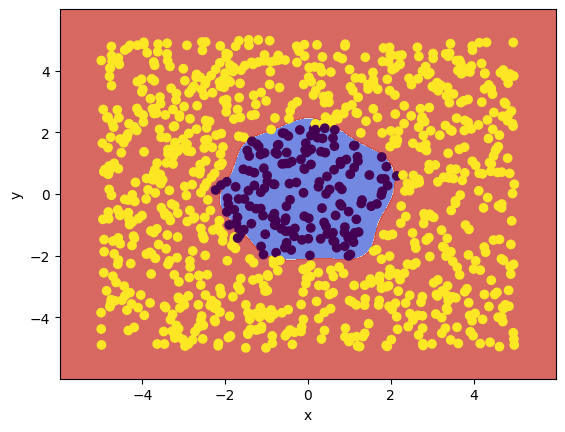

In [3]:
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
# use radial kernal: rbf
classifier = SVC(kernel = 'rbf', gamma = 1)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

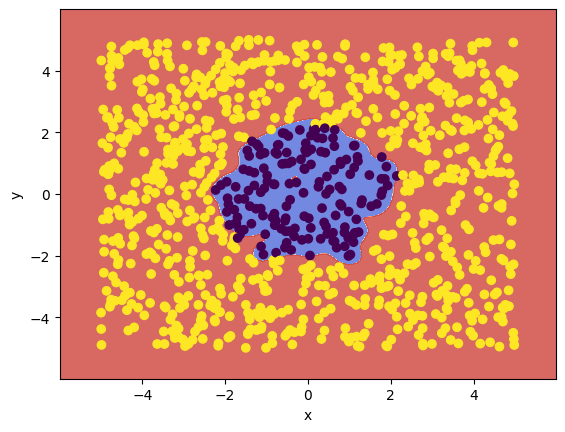

In [4]:
# Change gamma
X = data[:,:-1]
y = data[:,-1]
h = .02
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
classifier = SVC(kernel = 'rbf', gamma = 7)
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html - understand gammas better

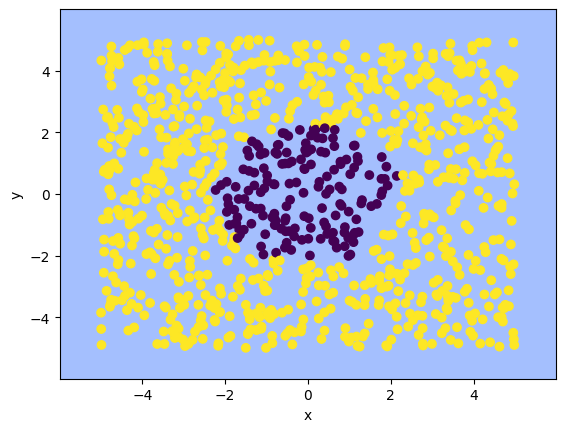

In [5]:
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.xlabel('x'); plt.ylabel('y')
plt.show()

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/ Nice blog post with effect of C and gamma on a different dataset

## Gridsearchcv

![image.png](attachment:image.png)

--------------------------------------

We'll be using this dataset: https://www.kaggle.com/akram24/social-network-ads
Download the dataset

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Social_Network_Ads.csv'

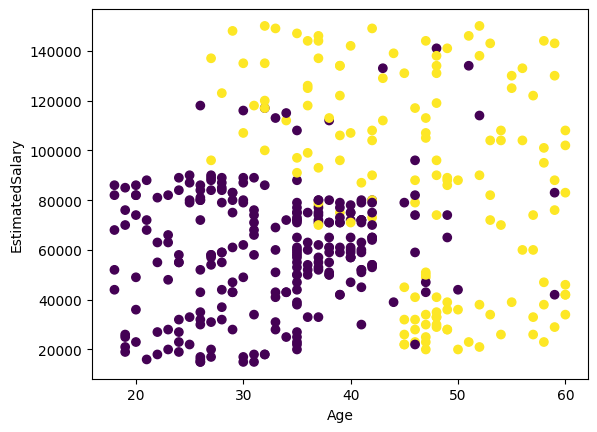

In [ ]:
plt.scatter(df.iloc[:,2], df.iloc[:,3],c=df.iloc[:,-1])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
X = df.iloc[:, 1:4]
for index, row in X.iterrows():
    if row['Gender'] == 'Male':
        X.loc[index, 'Gender'] = 0
    else:
        X.loc[index, 'Gender'] = 1

# predict whether or not a user purchased
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1998)
df_train = pd.concat([X_train, y_train], axis=1)

predictions = []
accuracies = []
m = 100
for i in range(m):
    df_bootstrap = df_train.sample(frac=1,replace=True, random_state = 42 + i)
    X_b = df_bootstrap.iloc[:,  :3]
    y_b = df_bootstrap.iloc[:, 3]
    #classifier = DecisionTreeClassifier(random_state = 0)
    classifier = SVC(kernel='rbf', gamma=1)
    classifier.fit(X_b, y_b)
    p = classifier.predict(X_train)
    # counts the number of times y_train = 1 and p >= 0.5
    accuracies.append(np.sum(y_train == (p >= 0.5)) / len(df))
    predictions.append(p)

In [ ]:
np.mean(accuracies)

0.7847750000000002

In [ ]:
total_predictions = predictions[0]

for i in range(1,m):
    total_predictions = total_predictions + predictions[i]

bootstrap_preds = (total_predictions / m) >=  0.5

In [ ]:
np.sum(y_train == bootstrap_preds) / len(df)

0.895

In [ ]:
# boopstrap_preds has a higher accuracy than the individual classifiers